In [57]:
%matplotlib inline
import numpy as np
from statsmodels.formula.api import ols, rlm, gls, glm, 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caso 2.1A.- Estimación de una función de consumo con datos de corte transversal.

En este ejercicio vamos a analizar la relación entre el consumo y la renta para un conjunto de familias, tratando de evaluar la función de consumo keynesiana. Los datos se refieren a los gastos en consumo y la renta de 50 familias, que se muestran en la siguiente tabla: 

|     |CONSUMO|RENTA||CONSUMO|RENTA|
|:---|:--------:|:------:|:---|:--------:|:------:|
|Familia 1| 1080,5| 1000|Familia 13| 3033,8| 3400|
|Familia 26| 5782,6| 6051|Familia 38| 6808,6| 8407|
|Familia 2| 1239,8| 1020|Familia 14| 3310,4| 3990|
|Familia 27| 4201,4| 6200|Familia 39| 7089,8| 8900|
|Familia 3| 1540,7| 1200|Familia 15| 4077,2| 4000|
|Familia 28| 6058,7| 6406|Familia 40| 6236,6| 9000|
|Familia 4| 1773,8| 1500|Familia 16| 2987,6| 4010|
|Familia 29| 4946,0| 6802|Familia 41| 6623,3| 9072|
|Familia 5| 1896,5| 1990|Familia 17| 3812,0| 4100|
|Familia 30| 5690,3| 7000|Familia 42| 7009,1| 9300|
|Familia 6| 1691,0| 2000|Familia 18| 3921,8| 4400|
|Familia 31| 5956,6| 7043|Familia 43| 8645,6| 9700|
|Familia 7| 1979,6| 2010|Familia 19| 4122,2| 4800|
|Familia 32| 4556,6| 7100|Familia 44| 9578,0| 9990|
|Familia 8| 1940,0| 2020|Familia 20| 4530,8| 5000|
|Familia 33| 6069,5| 7600|Familia 45| 7355,0| 10000|
|Familia 9| 2502,5| 2900|Familia 21| 4042,2| 5025|
|Familia 34| 7763,9| 7992|Familia 46| 7276,4| 10030|
|Familia 10| 2909,6| 3000|Familia 22| 3741,6| 5103|
|Familia 35| 6254,0| 8000|Familia 47| 9506,6| 10100|
|Familia 11| 2644,7| 3032|Familia 23| 4720,4| 5500|
|Familia 36| 5755,7| 8056|Familia 48| 8293,7| 10506|
|Familia 12| 2813,0| 3200|Familia 24| 5235,5| 5920|
|Familia 37| 6506,8| 8201|Familia 49| 7443,6| 10709|
|Familia 25| 5281,7| 6000|


    Alternativamente, se pueden tomar datos del INE de la encuesta de presupuestos familiares Base 2006 y de la encuesta anual de coste laboral, para obtener datos del Gasto total medio por unidad de consumo (asimilable al gasto en consumo anual) y Salario medio (asimilable a la renta anual) por comunidad autónoma y para un año determinado. Los resultados de las encuestas anteriores se encuentran en las secciones del INE correspondientes a Condiciones de vida y Mercado laboral respectivamente. Tendremos de esta manera datos de 18 comunidades autónomas españolas que podemos analizar.

Lo primero que vamos a hacer es un gráfico de dispersión entre las dos variables, para, a continuación hacer la regresión entre ambas. Una vez hecha la regresión y habiendo comentado los resultados desde el punto de vista económico, vamos a tratar de detectar la posible presencia de heteroscedasticidad por diversos métodos.

# a) 
## Método gráfico: 

Se trata de hacer un gráfico de los __residuos__ para ver si su varianza permanece constante. Además, se puede hacer otro gráfico de dispersión de la __serie del cuadrado de los residuos__ frente a la variable __Renta al cuadrado__ para analizar si existe algún grado de dependencia.

In [2]:
data = pd.read_csv('datos_caso2.1A.csv')

In [3]:
data.sort_values(by='obs').head()

,obs,consumo,renta
0,1,1080.5,1000
2,2,1239.8,1020
4,3,1540.7,1200
6,4,1773.8,1500
8,5,1896.5,1990


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


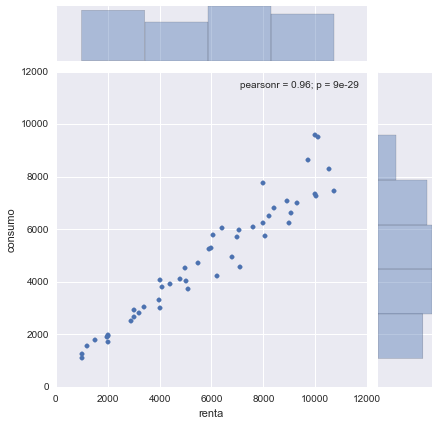

In [4]:
sns.jointplot(data=data, x='renta', y='consumo')

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


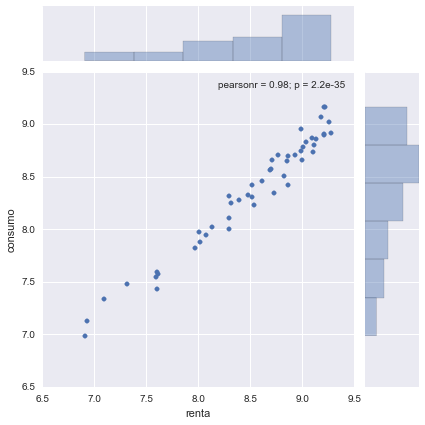

In [5]:
sns.jointplot(data=np.log(data), x='renta', y='consumo')

In [6]:
f = 'consumo ~ renta'
reg = ols(f, data).fit().get_robustcov_results()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     521.2
Date:                Thu, 12 Nov 2015   Prob (F-statistic):           4.42e-27
Time:                        15:43:33   Log-Likelihood:                -382.22
No. Observations:                  49   AIC:                             768.4
Df Residuals:                      47   BIC:                             772.2
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    482.1375    135.783      3.551      0.0

In [7]:
for i, (c, se) in enumerate(zip(reg.params, reg.bse)):
    print(r'$\beta_%s = %.3f (%.3f)$' % (i, c, se))

$\beta_0 = 482.138 (135.783)$
$\beta_1 = 0.744 (0.033)$


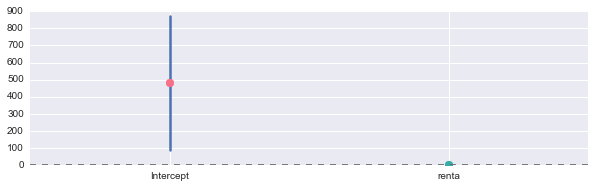

In [8]:
sns.coefplot(f, data, intercept=True)

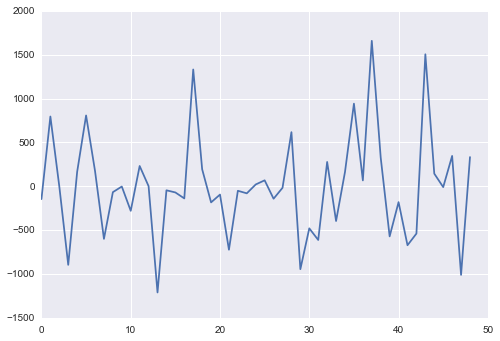

In [9]:
plt.plot(reg.resid)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


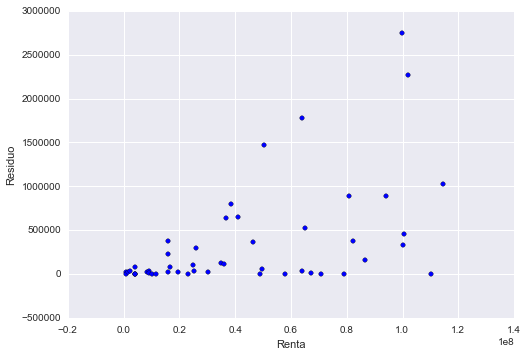

In [11]:
plt.scatter(data.renta ** 2, reg.resid ** 2)
plt.xlabel('Renta')
plt.ylabel('Residuo')

# b) 

## Contraste de White

Lo obtiene Gretl de forma automática haciendo una regresión auxiliar del cuadrado de los residuos sobre la variable exógena y su cuadrado, calculando para esta regresión el producto de T·R2, el cual se distribuye según una Chi-cuadrado con p grados de libertad, siendo p el número de regresores de esta regresión auxiliar.

In [12]:
t =  sm.stats.diagnostic.het_white(reg.resid, reg.model.exog)[:2]
string = '%.4f (%.4f)'
print('White: '+string % (t[0], t[1]))

White: 13.3226 (0.0013)


# c) 
## Contraste de Breusch-Pagan: 

El contraste de Breusch-Pagan que calcula Gretl incluye en la regresión auxiliar todo el conjunto de variables de nuestro modelo, como en nuestro caso tenemos sólo una variable, vamos a hacer el contraste de __forma manual__ para entender mejor cómo se lleva a cabo. Para obtener el estadístico de contraste BP se realiza una __regresión auxiliar__ donde, como variable __dependiente__ aparecen los __residuos al cuadrado__ del modelo estimado __divididos__ por la __estimación máximo verosímil de la varianza__, y como __variables explicativas__ aquellas que se piensa puedan causar el problema de varianza no constante, en nuestro caso, la __renta__.

Para el cálculo concreto del estadístico, dentro de la ventana de resultados de la estimación del modelo original, iremos a la opción Guardar-Definir nueva variable, y allí definiremos la variable siguiente: `bp1=($uhat^2)/($ess/$nobs)`, donde las variables con $ delante son variables internas que guarda Gretl cada vez que hace una regresión. Construida la variable dependiente de la regresión auxiliar, se efectúa dicha regresión y se calcula el estadístico de __Breusch-Pagan__ como el valor de la __Suma Explicada (SE) dividida por dos__ (la Suma Explicada se puede obtener en el menú ANOVA de los resultados de la regresión). Una vez calculado el estadístico, su valor se __compara con una Chi-cuadrado con p grados de libertad__ igual al número de parámetros de posición de la regresión auxiliar sin tener en cuenta el término independiente. Recordemos que Gretl permite obtener directamente el p-valor de un estadístico, conociendo los grados de libertad de la distribución que sigue, para ello hay que ir a la opción Herramientas-buscador de valores p, ir a la pestaña de la Chi-cuadrado y poner el valor del estadístico calculado y los grados de libertad (1 en nuestro caso porque sólo hemos considerado una explicativa). 


- Estimar el residuo del modelo orginal:

$$c = \hat{c}_a + \hat{c}_y·y + \hat{u}$$

- Estimar el residuo de la regresión auxiliar:

$$\frac{\hat{u}}{\widetilde{\sigma}_{\hat{c}}} = \hat{\gamma}_1 + \hat{\gamma}_2·y + \hat{\epsilon}$$

- El estimador BP:

$$BP = \frac{SE_{ra}}{2} \sim \chi^2(1)$$

In [33]:
sigma_mv = (reg.ssr / reg.nobs)
sigma_mv

349098.85807066207

In [40]:
bp_endog = reg.resid ** 2 / sigma_mv

In [42]:
data_bp = pd.DataFrame.from_dict({'endog': bp_endog, 'renta': data.renta})

In [55]:
fc = 'endog ~ renta'

regc = ols(fc, data_bp).fit()
e = 0.05 # signification
se_ra = np.power(regc.fittedvalues - regc.fittedvalues.mean(), 2) # SSE
se_ra = np.sum(se_ra)
bp_value = se_ra / 2
bp_score = (sns.stats.chi2.ppf(e/2, df=1),sns.stats.chi2.ppf(1 - e/2, df=1))
#bp_score = (sns.stats.f.ppf(e/2, 1, regc.nobs), sns.stats.f.ppf(1-e/2, 1,regc.nobs))

print(bp_value, bp_score)

17.8321203312 (0.00098206911717528024, 5.0238861873148881)


In [48]:
print(sms.anova_lm(reg))

          df      sum_sq    mean_sq          F    PR(>F)
renta      1   35.664241  35.664241  15.688633  0.000252
Residual  47  106.842917   2.273254        NaN       NaN


In [118]:
sms.diagnostic.het_breushpagan(reg.resid, reg.model.exog)

(12.262877320608398,
 0.00046205850806998159,
 15.688632969394533,
 0.00025192772295442304)

# d)  
## Vamos a tratar la posible presencia de heteroscedasticidad de la variable renta suponiendo dos tipos de estructuras heteroscedásticas:

- (1)  $V(u_i) = \alpha + \beta· renta_i^2$

- (2)  $log V(u_i) = \alpha + \beta · log(renta_i)$  $\longrightarrow$  heteroscedasticidad multiplicativa

Para determinar cuál de las dos estructuras es la más adecuada, habrá que hacer las regresiones que corresponda según el supuesto adoptado:

- si (1): $U^2 = \alpha + \beta · renta_i^2 + v_i$

- si (2): $log (U^2) = \alpha + \beta · log(renta_i) + v_i$

Se aceptará que existe un determinado __tipo de heteroscedasticidad__ u otro si en el modelo estimado la variable __log renta es significativa__, en ese caso, nos quedaremos con el modelo en que el __t-ratio sea mayor__. En caso de que se aceptara el primer tipo de heteroscedasticidad, para estimar el modelo de forma adecuada debemos aplicar Mínimos Cuadrados Generalizados Factibles, lo cual implica ponderar todas las variables del modelo por la desviación típica de la varianza, es decir, __dividir por la variable Renta__, tanto la variable endógena, como la constante y la variable exógena. Una vez construidas las nuevas variables, se estima el nuevo modelo por MCO y los nuevos coeficientes estimados ya están libres de problemas de heteroscedasticidad. En caso de aceptar __heteroscedasticidad multiplicativa__, para corregir el modelo original habría que ponderarlo por:

$\sqrt{e^{[\alpha + \beta · log (renta)]}}$

De este nuevo modelo se pueden __analizar los residuos__ para ver si su varianza ya es constante. Hacer el __gráfico__ de los __residuos__ frente a la variable __Renta__ y hacer también el contraste de __White__. __Valorar__ también el __cambio__ producido en los __parámetros__ estimados respecto al modelo inicial.

In [61]:
f
gls(f, data, )